<a href="https://colab.research.google.com/github/amansandhu408/deep-learning/blob/main/Zero_initialization_relu_tanh_sigmoid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "ushape.csv"

# Load the latest version
df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "saifullah57/ushape-dataset",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

100%|██████████| 7.41k/7.41k [00:00<00:00, 4.85MB/s]

First 5 records:           X         Y  class
0  0.031595  0.986988    0.0
1  2.115098 -0.046244    1.0
2  0.882490 -0.075756    0.0
3 -0.055144 -0.037332    1.0
4  0.829545 -0.539321    1.0


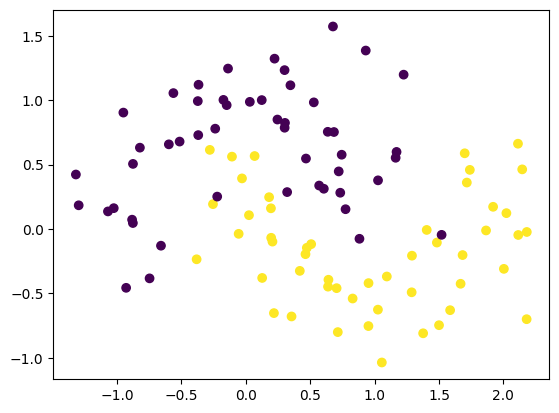

In [3]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [4]:
X= df.iloc[:,0:2].values
y= df.iloc[:,-1].values

In [5]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

# relu

In [6]:
model = Sequential()

model.add(Dense(2,activation='relu',input_dim=2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

# Set Weights

In [7]:
model.get_weights()

[array([[-0.12548494, -0.2578599 ],
        [ 1.1955432 ,  1.101473  ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.14263332],
        [ 0.16888034]], dtype=float32),
 array([0.], dtype=float32)]

In [20]:
initial_weights = model.get_weights()

In [12]:
initial_weights[0]=np.zeros(model.get_weights()[0].shape)
initial_weights[1]=np.zeros(model.get_weights()[1].shape)
initial_weights[2]=np.zeros(model.get_weights()[2].shape)
initial_weights[3]=np.zeros(model.get_weights()[3].shape)

In [13]:
model.set_weights(initial_weights)

In [14]:
model.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [15]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X, y , epochs=100, validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - accuracy: 0.5234 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4961 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5117 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4961 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4531 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4805 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4609 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4609 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss

In [16]:
model.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([-0.00161644], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


<Axes: >

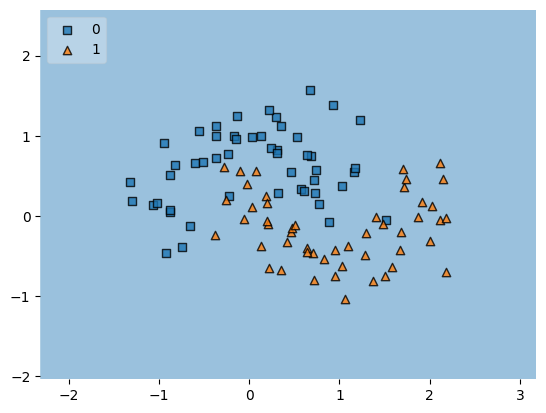

In [18]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'),clf=model, legend=2)

# tanh

In [19]:
model1 = Sequential()

model1.add(Dense(2,activation='tanh',input_dim=2))
model1.add(Dense(1, activation='sigmoid'))

model1.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [21]:
initial_weights = model1.get_weights()

In [22]:
initial_weights[0]=np.zeros(model1.get_weights()[0].shape)
initial_weights[1]=np.zeros(model1.get_weights()[1].shape)
initial_weights[2]=np.zeros(model1.get_weights()[2].shape)
initial_weights[3]=np.zeros(model1.get_weights()[3].shape)

In [24]:
model1.set_weights(initial_weights)

In [25]:
model1.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [27]:
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model1.fit(X, y , epochs=100, validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 679ms/step - accuracy: 0.4961 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 207ms/step - accuracy: 0.5156 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.4883 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 0.5352 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.5117 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4961 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4961 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5430 - loss: 0.6931 - val_accuracy: 0.5000 - val_l

In [28]:
model1.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([-0.00220835], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


<Axes: >

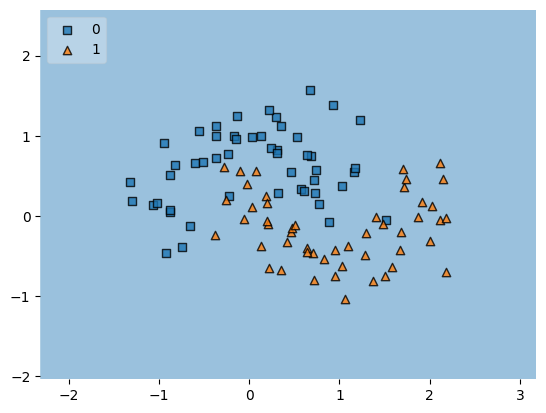

In [30]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'),clf=model1, legend=2)

# It's Same problem. therefore, do't initialize weights = zero.  

#Sigmoid

In [40]:
model2 = Sequential()

model2.add(Dense(10,activation='sigmoid',input_dim=2))
model2.add(Dense(1, activation='sigmoid'))

model2.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [41]:
initial_weights = model2.get_weights()

In [42]:
initial_weights[0]=np.zeros(model2.get_weights()[0].shape)
initial_weights[1]=np.zeros(model2.get_weights()[1].shape)
initial_weights[2]=np.zeros(model2.get_weights()[2].shape)
initial_weights[3]=np.zeros(model2.get_weights()[3].shape)

In [43]:
model2.set_weights(initial_weights)

In [44]:
model2.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [45]:
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model2.fit(X, y , epochs=100, validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - accuracy: 0.4758 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5117 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5039 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5195 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4680 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4961 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4766 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.5234 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss

In [46]:
model2.get_weights()

[array([[ 0.41306165,  0.41306165,  0.41306165,  0.41306165,  0.41306165,
          0.41306165,  0.41306165,  0.41306165,  0.41306165,  0.41306165],
        [-0.44887632, -0.44887632, -0.44887632, -0.44887632, -0.44887632,
         -0.44887632, -0.44887632, -0.44887632, -0.44887632, -0.44887632]],
       dtype=float32),
 array([-0.1333623, -0.1333623, -0.1333623, -0.1333623, -0.1333623,
        -0.1333623, -0.1333623, -0.1333623, -0.1333623, -0.1333623],
       dtype=float32),
 array([[0.05124773],
        [0.05124773],
        [0.05124773],
        [0.05124773],
        [0.05124773],
        [0.05124773],
        [0.05124773],
        [0.05124773],
        [0.05124773],
        [0.05124773]], dtype=float32),
 array([-0.05245126], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


<Axes: >

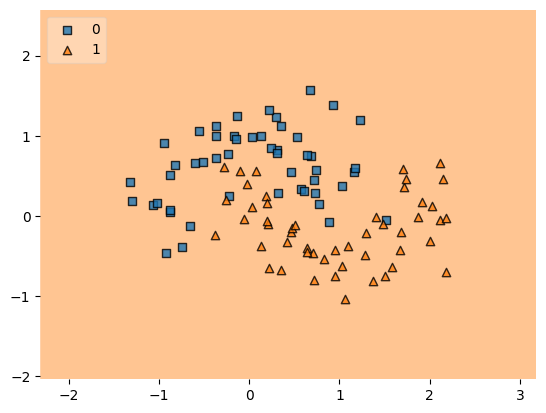

In [52]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'),clf=model2, legend=2)

# similarly , if we initialise with and constand value, nodes will be more but it will act as Linear model (perceptron only)

relu

In [54]:
model3 = Sequential()

model3.add(Dense(2,activation='relu',input_dim=2))
model3.add(Dense(1, activation='sigmoid'))

initial_weights = model3.get_weights()

initial_weights[0]=np.ones(model3.get_weights()[0].shape)*0.5
initial_weights[1]=np.ones(model3.get_weights()[1].shape)*0.5
initial_weights[2]=np.ones(model3.get_weights()[2].shape)*0.5
initial_weights[3]=np.ones(model3.get_weights()[3].shape)*0.5

model3.set_weights(initial_weights)

model3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model3.fit(X, y , epochs=100, validation_split=0.2)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - accuracy: 0.5391 - loss: 0.8679 - val_accuracy: 0.5000 - val_loss: 0.8204
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4883 - loss: 0.9505 - val_accuracy: 0.5000 - val_loss: 0.8176
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5234 - loss: 0.9037 - val_accuracy: 0.5000 - val_loss: 0.8148
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5195 - loss: 0.8832 - val_accuracy: 0.5000 - val_loss: 0.8120
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5078 - loss: 0.9047 - val_accuracy: 0.5000 - val_loss: 0.8092
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4844 - loss: 0.9263 - val_accuracy: 0.5000 - val_loss: 0.8065
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5234 - loss: 0.8911 - val_accuracy: 0.5000 - val_loss: 0.8037
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4922 - loss: 0.9047 - val_accuracy: 0.5000 - val_loss: 0.8010
Epo

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


<Axes: >

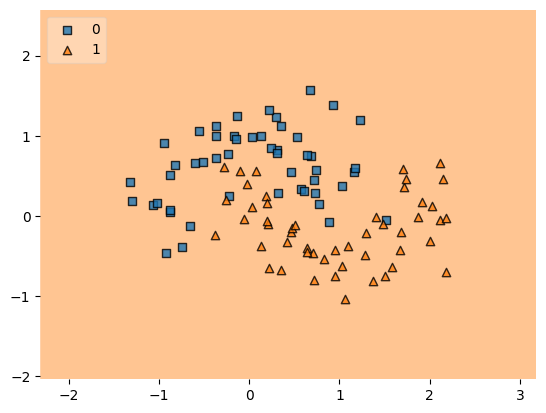

In [55]:
plot_decision_regions(X,y.astype('int'),clf=model3, legend=2)

tanh

In [56]:
model4 = Sequential()

model4.add(Dense(2,activation='tanh',input_dim=2))
model4.add(Dense(1, activation='sigmoid'))

initial_weights = model4.get_weights()

initial_weights[0]=np.ones(model4.get_weights()[0].shape)*0.5
initial_weights[1]=np.ones(model4.get_weights()[1].shape)*0.5
initial_weights[2]=np.ones(model4.get_weights()[2].shape)*0.5
initial_weights[3]=np.ones(model4.get_weights()[3].shape)*0.5

model4.set_weights(initial_weights)

model4.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model4.fit(X, y , epochs=100, validation_split=0.2)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - accuracy: 0.5039 - loss: 0.8458 - val_accuracy: 0.5000 - val_loss: 0.7755
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5312 - loss: 0.8182 - val_accuracy: 0.5000 - val_loss: 0.7729
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5156 - loss: 0.8276 - val_accuracy: 0.5000 - val_loss: 0.7703
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5000 - loss: 0.8432 - val_accuracy: 0.5000 - val_loss: 0.7677
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5039 - loss: 0.8285 - val_accuracy: 0.5000 - val_loss: 0.7653
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5234 - loss: 0.8180 - val_accuracy: 0.5000 - val_loss: 0.7628
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5000 - loss: 0.8306 - val_accuracy: 0.5000 - val_loss: 0.7604
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4922 - loss: 0.8510 - val_accuracy: 0.5000 - val_loss: 0.7581
Epo

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


<Axes: >

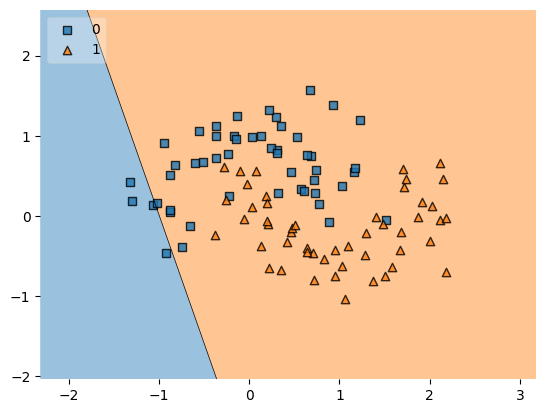

In [57]:
plot_decision_regions(X,y.astype('int'),clf=model4, legend=2)

Sigmoid

In [48]:
model5 = Sequential()

model5.add(Dense(10,activation='sigmoid',input_dim=2))
model5.add(Dense(1, activation='sigmoid'))

model5.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [50]:
initial_weights = model5.get_weights()

initial_weights[0]=np.ones(model5.get_weights()[0].shape)*0.5
initial_weights[1]=np.ones(model5.get_weights()[1].shape)*0.5
initial_weights[2]=np.ones(model5.get_weights()[2].shape)*0.5
initial_weights[3]=np.ones(model5.get_weights()[3].shape)*0.5

model5.set_weights(initial_weights)

In [51]:
model5.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model5.fit(X, y , epochs=100, validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - accuracy: 0.4727 - loss: 2.1057 - val_accuracy: 0.5000 - val_loss: 1.8420
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5000 - loss: 1.9927 - val_accuracy: 0.5000 - val_loss: 1.8296
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4688 - loss: 2.1138 - val_accuracy: 0.5000 - val_loss: 1.8173
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5039 - loss: 1.9554 - val_accuracy: 0.5000 - val_loss: 1.8050
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5195 - loss: 1.8995 - val_accuracy: 0.5000 - val_loss: 1.7927
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4922 - loss: 1.9780 - val_accuracy: 0.5000 - val_loss: 1.7805
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4805 - loss: 1.9919 - val_accuracy: 0.5000 - val_loss: 1.7682
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5234 - loss: 1.8502 - val_accuracy: 0.5000 - val_loss

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


<Axes: >

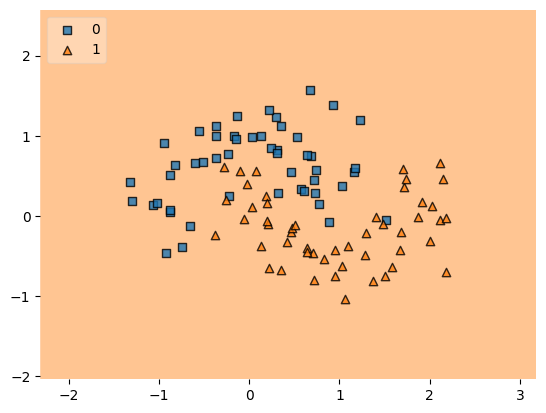

In [59]:
plot_decision_regions(X,y.astype('int'),clf=model5, legend=2)